# Ensemble Learning Methods Comparison



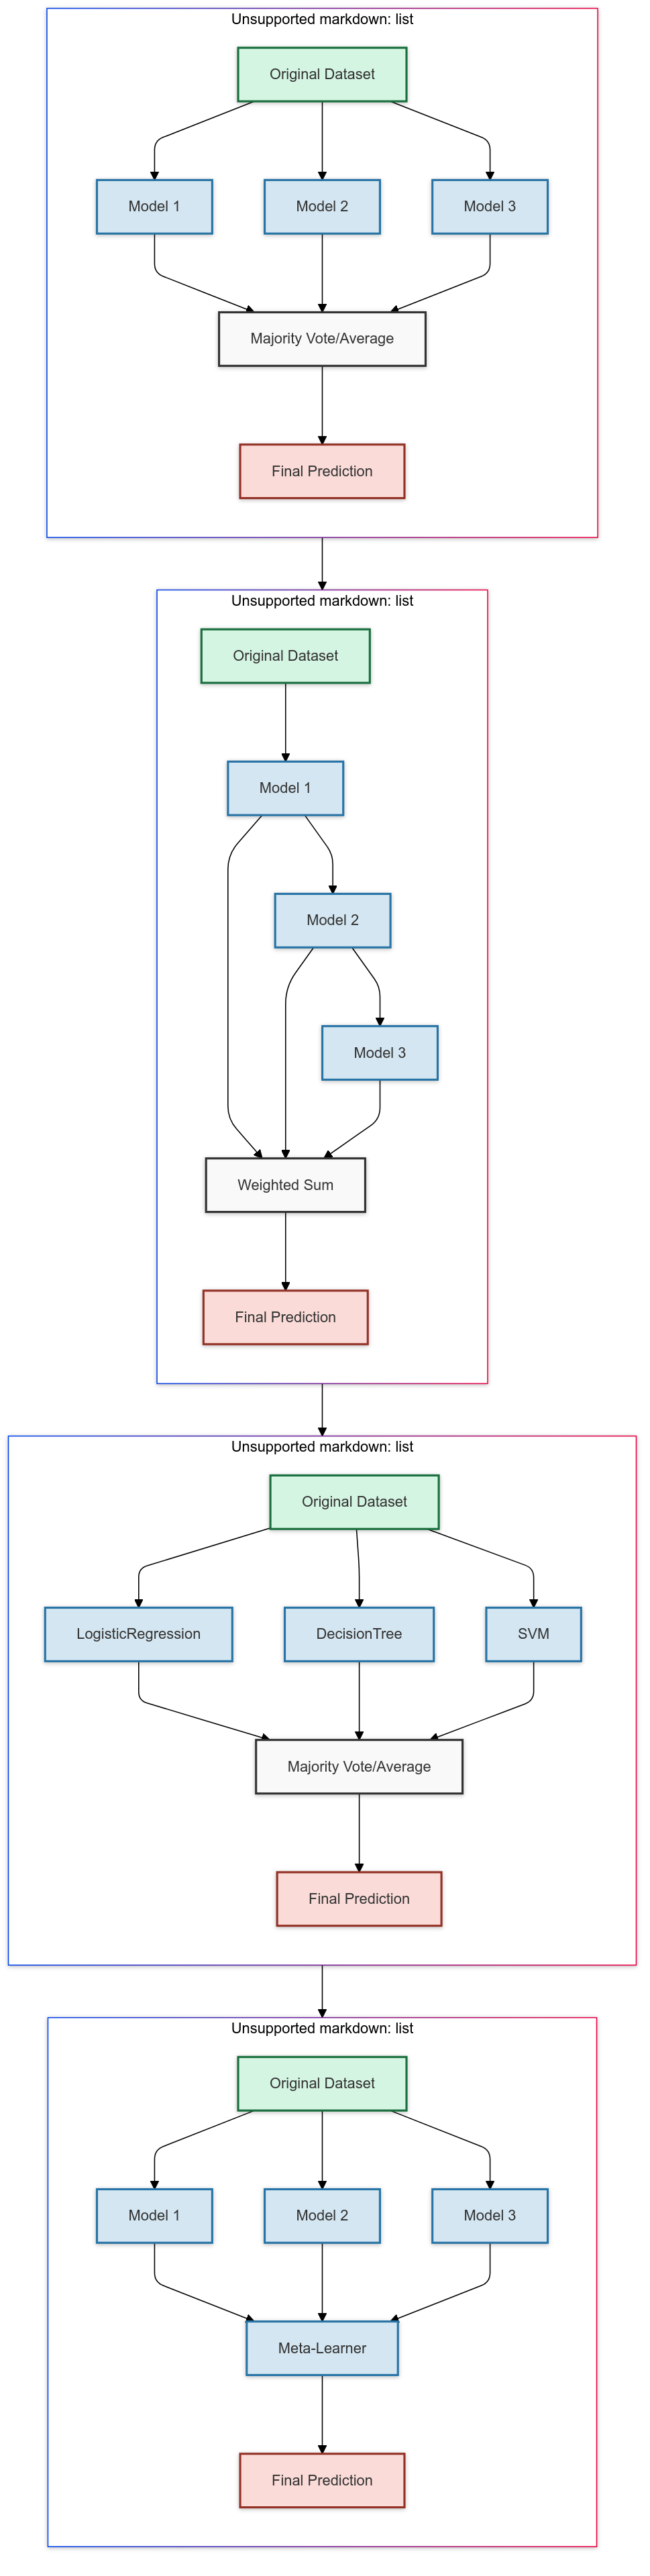

## 1. Bagging (Bootstrap Aggregating)

### Description
- Creates multiple models trained on different random subsets of the training data
- Combines predictions through averaging (regression) or voting (classification)

### Key Characteristics
- Parallel training
- Random sampling with replacement
- Same base algorithm
- Independent models

### Advantages
- Reduces overfitting
- Decreases variance
- Good for high-variance models
- Parallel processing possible

### Disadvantages
- May not be as effective for high-bias models
- Requires more memory
- Can be computationally intensive

### Example Code
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create base estimator
base_estimator = DecisionTreeClassifier()

# Create bagging classifier
bagging = BaggingClassifier(
    base_estimator=base_estimator,
    n_estimators=10,
    max_samples=0.8,
    max_features=0.8,
    random_state=42
)

# Train the model
bagging.fit(X_train, y_train)

# Make predictions
predictions = bagging.predict(X_test)
```



## 2. Boosting

### Description
- Sequentially trains weak learners
- Each subsequent model focuses on the mistakes of previous models

### Key Characteristics
- Sequential training
- Weighted samples
- Adaptive learning
- Strong focus on errors

### Advantages
- High accuracy
- Good for both high-bias and high-variance problems
- Efficient memory usage

### Disadvantages
- Prone to overfitting
- Sensitive to noisy data
- Sequential nature (slower training)

### Example Code
```python
from sklearn.ensemble import GradientBoostingClassifier

# Create gradient boosting classifier
boosting = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
boosting.fit(X_train, y_train)

# Make predictions
predictions = boosting.predict(X_test)
```



## 3. Voting

### Description
- Combines predictions from multiple different models
- Uses majority voting (classification) or averaging (regression)

### Key Characteristics
- Different base algorithms
- Parallel training
- Simple combination rules

### Advantages
- Robust predictions
- Less prone to overfitting
- Can leverage strengths of different algorithms

### Disadvantages
- May not perform better than best individual model
- Requires careful model selection
- Can be computationally expensive

### Example Code
```python
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create individual classifiers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC(probability=True)

# Create voting classifier
voting = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('dt', clf2),
        ('svc', clf3)
    ],
    voting='soft'
)

# Train the model
voting.fit(X_train, y_train)

# Make predictions
predictions = voting.predict(X_test)
```



## 4. Stacking

### Description
- Trains multiple base models
- Uses a meta-model to learn how to best combine their predictions

### Key Characteristics
- Multiple base models
- Meta-learner
- Cross-validation based training

### Advantages
- Can achieve higher accuracy
- Learns optimal combination strategy
- Can capture non-linear relationships

### Disadvantages
- Complex to implement
- Computationally intensive
- Risk of overfitting

### Example Code
```python
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Create meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5
)

# Train the model
stacking.fit(X_train, y_train)

# Make predictions
predictions = stacking.predict(X_test)
```



## Implementation Considerations

### Hyperparameter Tuning
- All methods benefit from proper hyperparameter tuning
- Use Grid Search or Random Search with cross-validation
- Consider computational costs when tuning

### Model Selection Guidelines
- Bagging: Best with complex models (high variance)
- Boosting: Works well with simple models (weak learners)
- Voting: Benefits from diverse base models
- Stacking: Requires careful selection of both base models and meta-learner

### Performance Considerations
- Bagging and Voting: Can be parallelized
- Boosting: Must be sequential
- Stacking: Multiple training phases required

### Memory Usage
- Bagging: Multiple model copies needed
- Boosting: Lower memory requirements
- Voting: Depends on base models
- Stacking: Highest memory requirements

### When to Use Each Method
- Bagging: When base model is overfitting
- Boosting: When base model is underfitting
- Voting: When you have multiple good models
- Stacking: When maximizing performance is priority